In [3]:
#!pip install pandas 
#!pip install matplotlib
#!pip install plotly
#!pip install seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import plotly.express as px
import seaborn as sns

In [3]:
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates = ["date"], index_col = 'date')
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [14]:
lower_bound = df['value'].quantile(0.025)
upper_bound = df['value'].quantile(0.975)

np.float64(177613.075)

In [20]:
filtered = df[(df['value'] > lower_bound) & (df['value'] < upper_bound)]

,date,value
10,2016-05-19,19736
17,2016-05-26,18060
18,2016-05-27,19997
19,2016-05-28,19044
20,2016-05-29,20325
...,...,...
1294,2019-11-24,138875
1299,2019-11-29,171584
1300,2019-11-30,141161
1301,2019-12-01,142918


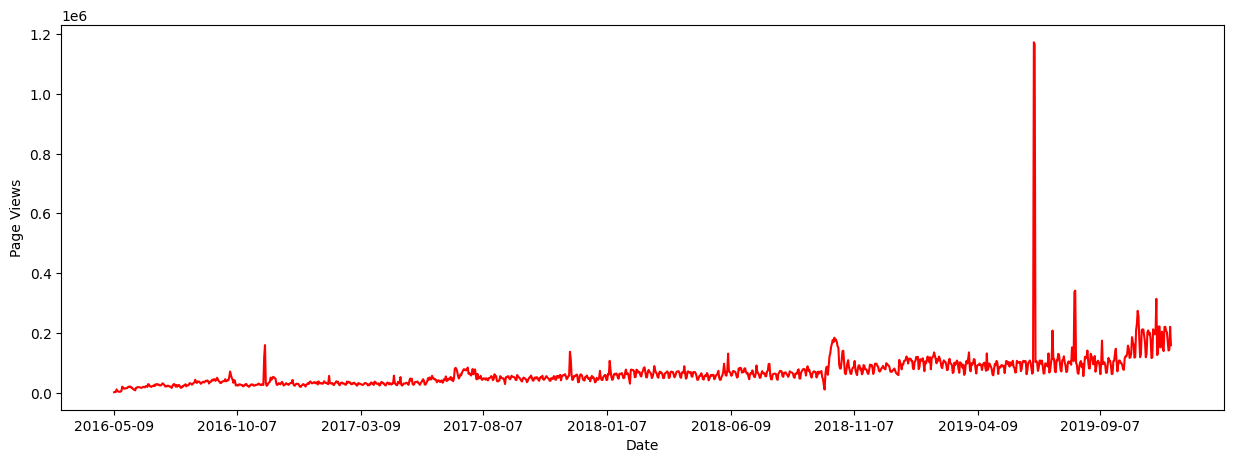

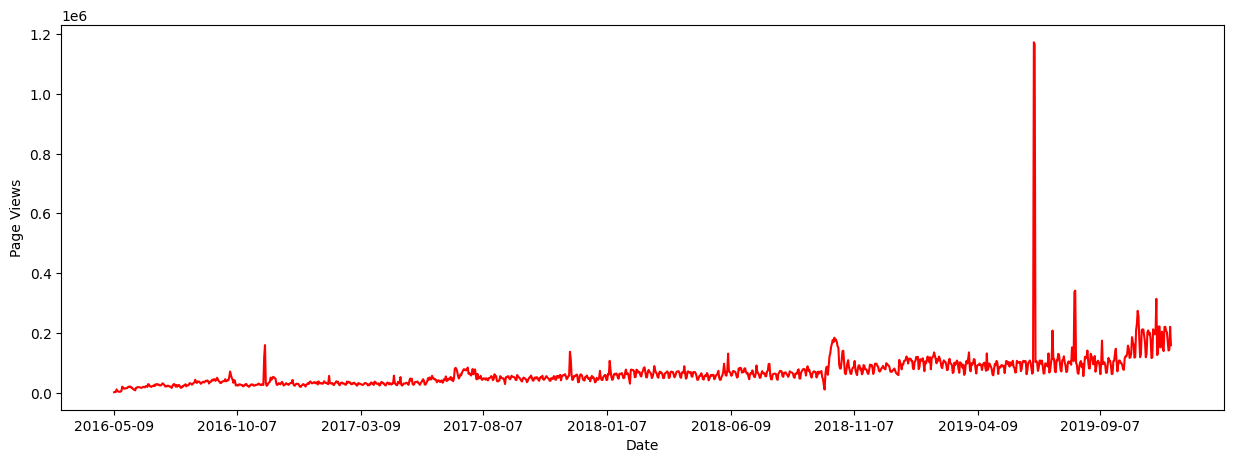

In [45]:
def draw_line_plot():

    fig, ax = plt.subplots(figsize=(15, 5)) 

    ax.plot(df['date'], df['value'], color='r')
    
    # Format the x-axis to show ticks every 5 months
    locator = mdates.MonthLocator(interval=5)  # Show ticks every 5 months
    ax.xaxis.set_major_locator(locator)
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')
    
    # Save the plot before showing it
    fig.savefig('line_plot.png')
    
    # Return the figure object
    return fig

draw_line_plot()

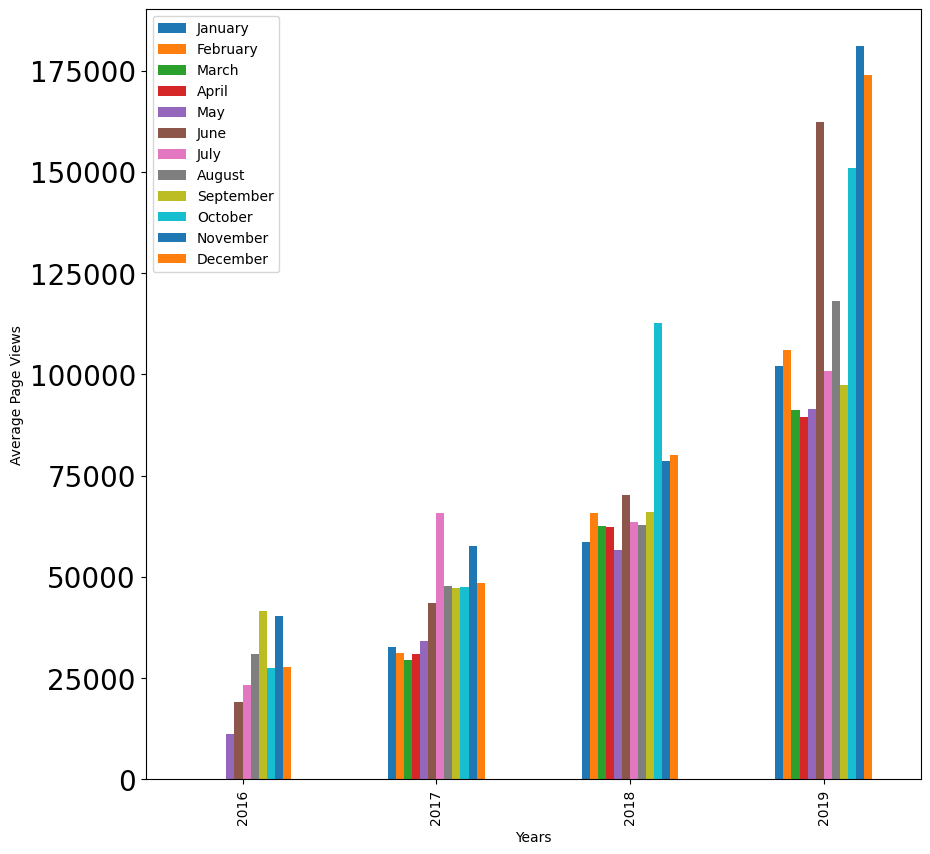

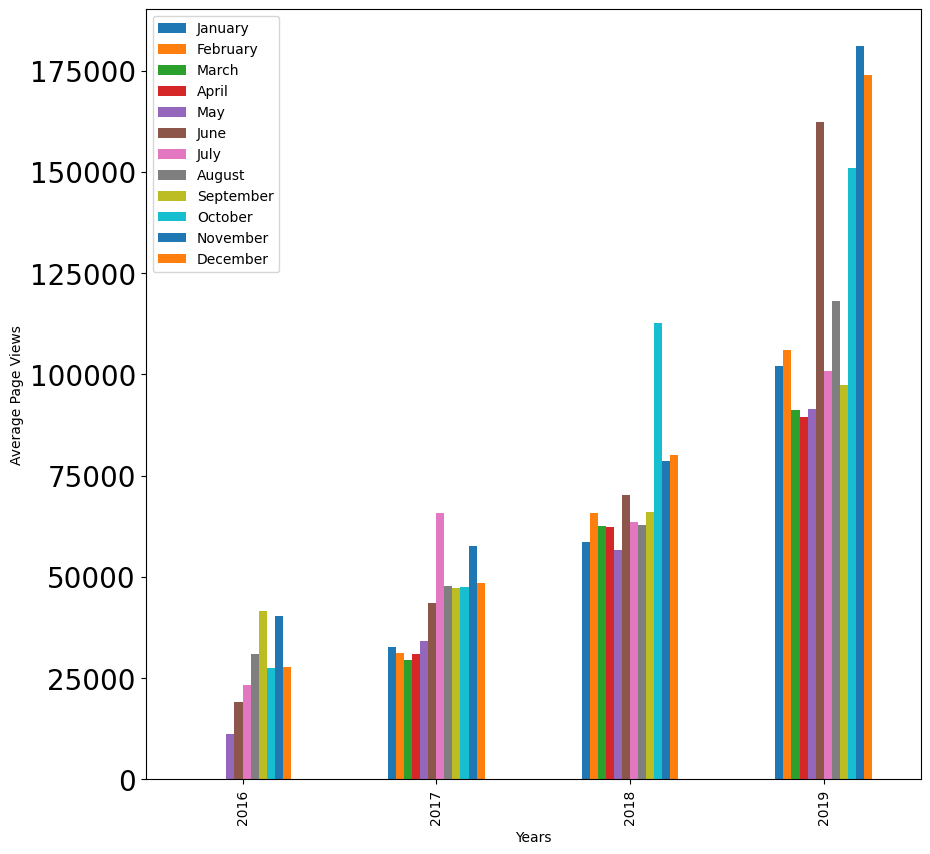

In [13]:
def draw_bar_plot():

    df['month'] = df.index.month
    df['year'] = df.index.year
    df_bar = df.groupby(['year', 'month'])['value'].mean()
    df_bar = df_bar.unstack()


    fig = df_bar.plot.bar(legend = True, figsize=(10,10), ylabel = "Average Page Views", xlabel="Years").figure
    plt.legend(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 20)

    fig.savefig('bar_plot.png')    
    return fig

draw_bar_plot()

In [11]:

df_bar

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,11242.695652,19124.366667,23314.225806,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,112592.000000,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,162402.600000,100804.451613,117991.032258,97268.833333,150862.709677,181026.700000,173870.333333
